In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Model Evaluation<br><br>Data Splits Assignment</b></font>

# Getting and preparing the data

1. Use the attached dataset from [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/train.csv?select=train.csv)
2. Look at the [Data Dictionary](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/data_description.txt?select=data_description.txt)
3. Split the data into input features and target variable.  **Hint**: Target variable - what we are predicting - check in Data Dictionary.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# your code here
df = pd.read_csv('train (2).csv')
target = 'SalePrice'
input_feature = df.drop(columns = [target,'Id']).columns.to_list()
X = df[input_feature]
y = df[target]

X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Q1 - Random split

**Instructions:**

* Q1.1 Split the data into `train`, `validation`, `test` sets **randomly** into 50/20/30 split
  - Save the variables from this split with unique names and don't override them for use in future questions
  - Use `random_state` parameter to make sure your results are reproducible

In [4]:
# your code here
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size = 0.285,random_state = 42)


* Q1.2. Prove the split was done successfully


In [5]:
# your code here
assert X_test.shape[0]/X.shape[0] *100 == 30.0
assert X_train.shape[0]/X.shape[0] *100 == 50.0
assert X_val.shape[0]/X.shape[0] *100 == 20.0

* Q1.3 Plot and show that the distribution of the target variable is similar between the 3 sets

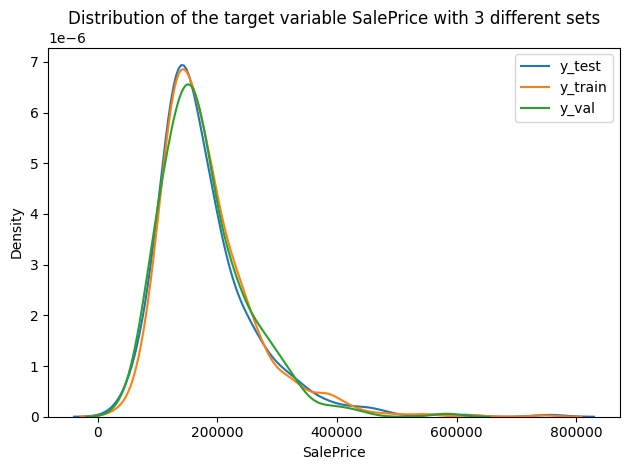

In [6]:
# your code here
f = plt.figure()
sns.kdeplot(y_test, label = 'y_test')
sns.kdeplot(y_train, label = 'y_train')
sns.kdeplot(y_val, label = 'y_val')
plt.title('Distribution of the target variable SalePrice with 3 different sets')
plt.legend()
plt.tight_layout()
plt.show()

# Q2 - Groups split

**Instructions:**
Let's say we want to use this model to predict house prices in **neighbourhoods it hasn't seen**, and we want to check how well our model would perform.  In order to do that, let's split our data in a way that same `Neighborhood` data doesn't appear both in train and test sets.
* Q2.1. How many neighbourhoods are there in the whole dataset?

In [7]:
# your code here
print(f"We have {len(set(df.Neighborhood))} neighbourhoods in the whole dataset")

We have 25 neighbourhoods in the whole dataset


* Q2.2. If you would split into `train`, `validataion`, `test` datasets just based on 50/20/30 ratio by number of unique neighbourhoods in each set, how many neighbourhoods would each set contain?


In [8]:
# your code here
cum_sum = pd.DataFrame(df.Neighborhood.value_counts().cumsum()/len(df.Neighborhood))
print(f"train :  {len(cum_sum[cum_sum.Neighborhood <= 0.5])}, validation : {len(cum_sum[(cum_sum.Neighborhood >0.5) & (cum_sum.Neighborhood <=0.7)])}, test : {len(cum_sum[cum_sum.Neighborhood >0.7])}")

train :  5, validation : 4, test : 16


* Q2.3. Split the data into `train`, `validation`, `test` sets based on **unique neighbourhoods** into 50/20/30 ratio if counting individual house sales


In [9]:
# your code here
train_indexes = cum_sum[cum_sum.Neighborhood <= 0.52].index.values
validation_indexes = cum_sum[(cum_sum.Neighborhood >0.52) & (cum_sum.Neighborhood <=0.71)].index.values
test_indexes = cum_sum[cum_sum.Neighborhood > 0.71].index.values

X_train = df.loc[df.Neighborhood.isin(train_indexes), input_feature]
X_val = df.loc[df.Neighborhood.isin(validation_indexes), input_feature]
X_test = df.loc[df.Neighborhood.isin(test_indexes), input_feature]

y_train = df.loc[df.Neighborhood.isin(train_indexes), target]
y_val = df.loc[df.Neighborhood.isin(validation_indexes), target]
y_test = df.loc[df.Neighborhood.isin(test_indexes), target]


* Q2.4. Prove the split was done successfully

In [10]:
# your code here
print(f"length X_train : {X_train.shape[0]/df.shape[0]}, length X_val : {X_val.shape[0]/df.shape[0]}, length X_test : {X_test.shape[0]/df.shape[0]}")



length X_train : 0.5157534246575343, length X_val : 0.19383561643835617, length X_test : 0.29041095890410956


* Q2.5. What percentage of houses do we have in each one of the sets?


In [11]:
# your code here
houses_train_set = X_train.shape[0]/df.shape[0]
houses_validation_set = X_val.shape[0]/df.shape[0]
houses_test_set = X_test.shape[0]/df.shape[0]
print(f" We have {round(X_train.shape[0]/df.shape[0]*100):.2f} % of houses in X_train ")
print(f" We have {round(X_val.shape[0]/df.shape[0]*100):.2f} % of houses in X_val ")
print(f" We have {round(X_test.shape[0]/df.shape[0]*100):.2f} % of houses in X_test ")

 We have 52.00 % of houses in X_train 
 We have 19.00 % of houses in X_val 
 We have 29.00 % of houses in X_test 


* Q2.6. What percentage of neighbourhoods do we have in each one of the sets?  How do you explain the difference from bullet 2 above?

In [12]:
# your code here
perc_neigh_train = len(set(X_train.Neighborhood))/len(set(df.Neighborhood))*100
perc_neigh_val = len(set(X_val.Neighborhood))/len(set(df.Neighborhood))*100
perc_neigh_test = len(set(X_test.Neighborhood))/len(set(df.Neighborhood))*100
print(f"We have {round(perc_neigh_train):.2f} % of neighborhoods in X_train")
print(f"We have {round(perc_neigh_val):.2f} % of neighborhoods in X_val")
print(f"We have {round(perc_neigh_test):.2f} % of neighborhoods in X_test")

# In a neighborhood we can have a lot or a few houses, so even if a set have a lot of neighborhood,
# it does not mean that it contains a lot of houses ( which is the case for X_train)
# X_test does not have a lot of neighborhoods but each neighborhoods have a lot of houses

We have 24.00 % of neighborhoods in X_train
We have 16.00 % of neighborhoods in X_val
We have 60.00 % of neighborhoods in X_test


# Q3 - By date

 **Instructions:**
* Q 3.1. Split the data into `train`, `test` sets (no `validation`) by **month** + **year** of sale (**hint:** see data dictionary) into **70/30 split**, where the **train data has earlier dates**


In [13]:
set(df.YrSold)

{2006, 2007, 2008, 2009, 2010}

In [14]:
# your code here
train_set_fraction = 0.7
X = df.sort_values(['YrSold','MoSold']).reset_index()
ind_split = int(len(X)* train_set_fraction)+1
X_train = X[input_feature].iloc[:ind_split]
y_train = X[target].iloc[:ind_split]
X_test = X[input_feature].iloc[ind_split:]
y_test = X[target].iloc[ind_split:]


* Q3.2. Prove the split was done successfully


In [15]:
# your code here
assert X_train.shape[0]/df.shape[0] == 0.7
assert X_test.shape[0]/df.shape[0] == 0.3
assert y_train.shape[0]/df.shape[0] == 0.7
assert y_test.shape[0]/df.shape[0] == 0.3

* Q3.3. Plot and show the distribution of the target variable between the 2 sets.  Is it similar or different? What conclusion can you draw from that?

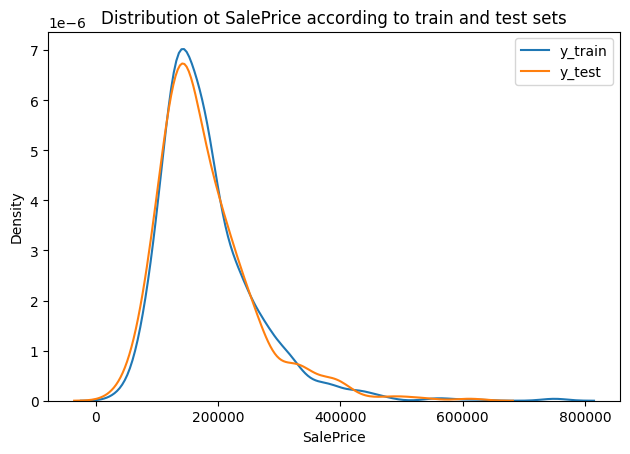

In [16]:
# your code here
f = plt.figure()
sns.kdeplot(y_train, label = 'y_train')
sns.kdeplot(y_test, label = 'y_test')
plt.title('Distribution ot SalePrice according to train and test sets')
plt.legend()
plt.tight_layout()
plt.show()

The two plots are very similar.
It means that even if we order the data, the distribution of the target variable is the same. Then, our model will perform well on the test data.

# Q4 - Stratified split

**Instructions:**
* Q4.1. Take results from **random** split in Question 1.


In [17]:
# your code here
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size = 0.285,random_state = 42)

* Q4.2. Plot the distribution differences of feature `MoSold` of `train`, `validation` & `test` sets .

    As we can see, the distributions are very similar, but not exactly the same.
  - Which set has slightly lower values per month?


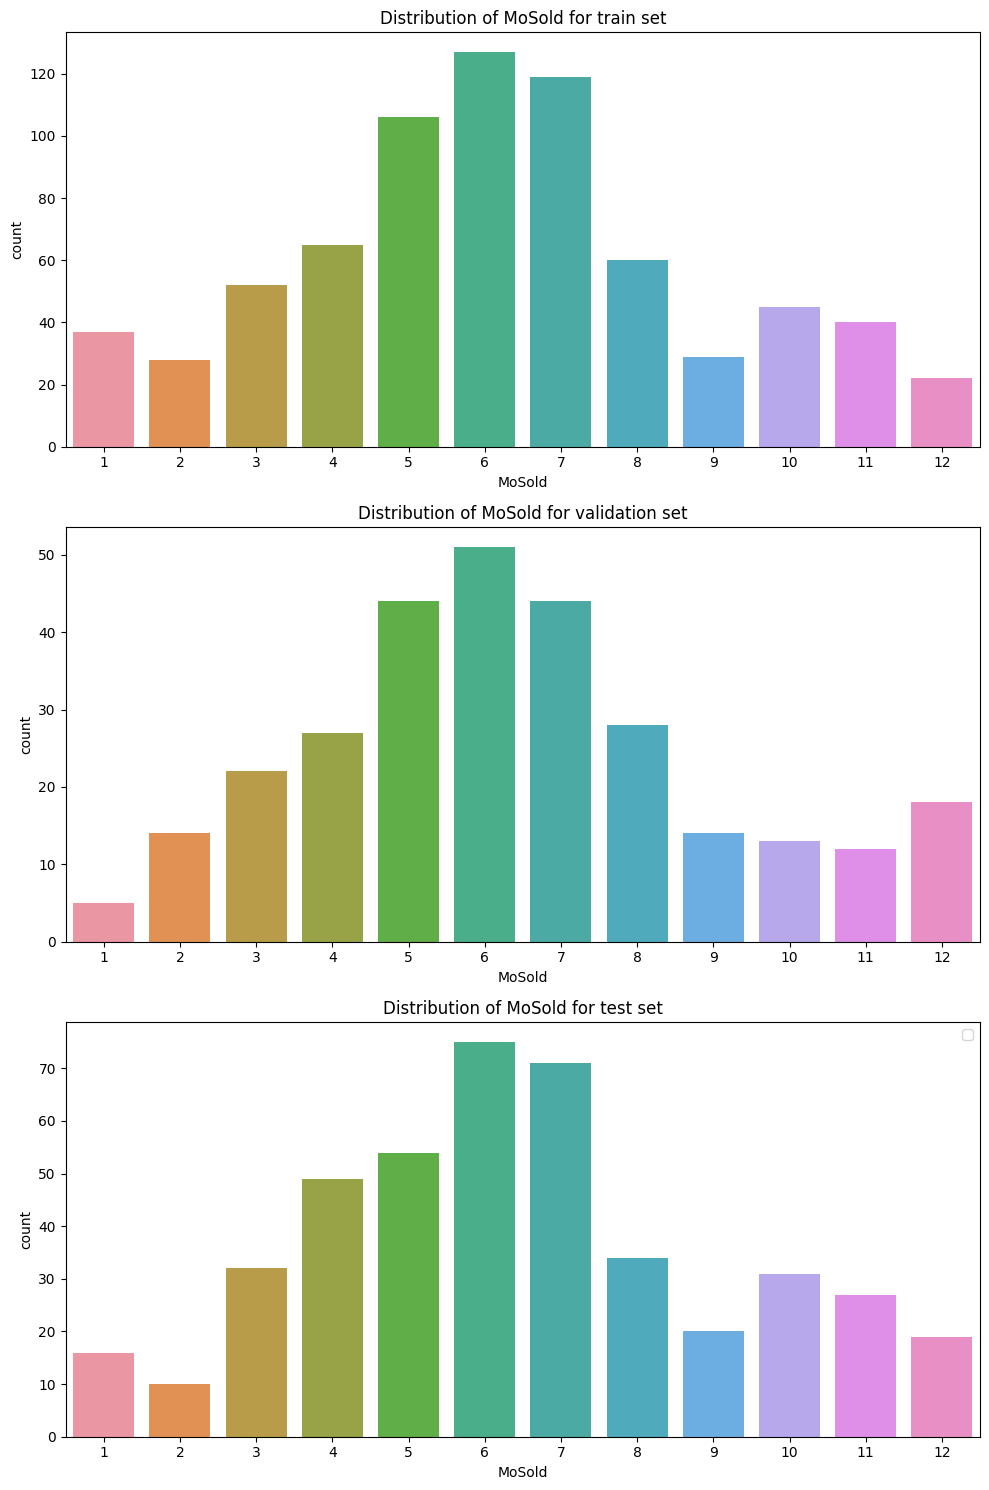

In [18]:
# your code here
f, axes = plt.subplots(3,1, figsize = (10,15))

sns.countplot(data = X_train, x = 'MoSold', ax = axes[0])
axes[0].set_title('Distribution of MoSold for train set')
sns.countplot(data = X_val, x = 'MoSold', ax = axes[1])
axes[1].set_title('Distribution of MoSold for validation set')
sns.countplot(data = X_test, x = 'MoSold', ax = axes[2])
axes[2].set_title('Distribution of MoSold for test set')

plt.legend()
plt.tight_layout()
plt.show()


The validation set has slightly lower values

* Q4.3. Let's assume that the month of the sale effects the house price (let's not prove it now).  Use **random split** datasets from above.  

  - Compare distributions of month between different sets.  Are the distributions different?  How?
  - Do you think the differences in distributions will effect what our model learns or the results of our model? How so?


In [19]:
# your code here
# I think it is the same question as Q4.2. We have different distributions.
# The train set has higher values, whereas the validation set has lower values.

* Q4.4. Split the data into `train`, `validation`, `test` sets based on **stratified split** using this feature into 50/20/30 split


In [20]:
# your code here
X_strat_train_val, X_strat_test, y_strat_train_val, y_strat_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = X.MoSold)

X_strat_train, X_strat_val, y_strat_train, y_strat_val = train_test_split(X_strat_train_val,y_strat_train_val,test_size = 0.285,random_state = 42, stratify = X_strat_train_val.MoSold)

* Q4.5. Prove the split was done successfully


In [21]:
# your code here
for value in set(X.MoSold):
  print(f" \n For {value}: \n")
  print(len(X_strat_train[X_strat_train.MoSold==value])/len(X_strat_train))
  print(len(X_strat_val[X_strat_val.MoSold==value])/len(X_strat_val))
  print(len(X_strat_test[X_strat_test.MoSold==value])/len(X_strat_test))



 
 For 1: 

0.03972602739726028
0.0410958904109589
0.03881278538812785
 
 For 2: 

0.03561643835616438
0.03424657534246575
0.0365296803652968
 
 For 3: 

0.07260273972602739
0.07191780821917808
0.0730593607305936
 
 For 4: 

0.09726027397260274
0.0958904109589041
0.0958904109589041
 
 For 5: 

0.13972602739726028
0.1404109589041096
0.13926940639269406
 
 For 6: 

0.1726027397260274
0.17465753424657535
0.1735159817351598
 
 For 7: 

0.16027397260273973
0.16095890410958905
0.1598173515981735
 
 For 8: 

0.08493150684931507
0.0821917808219178
0.0821917808219178
 
 For 9: 

0.043835616438356165
0.0410958904109589
0.04337899543378995
 
 For 10: 

0.06027397260273973
0.06164383561643835
0.06164383561643835
 
 For 11: 

0.05342465753424658
0.0547945205479452
0.0547945205479452
 
 For 12: 

0.03972602739726028
0.0410958904109589
0.0410958904109589


For each set, we see that the proportion of each months is equally splitted.

* Q4.6. Plot the distribution differences of feature `MoSold` of `train`, `validation` & `test` sets of the new split

<ipython-input-22-a36320477a40>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentages = combined_df.groupby(['Source', 'MoSold']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percent')


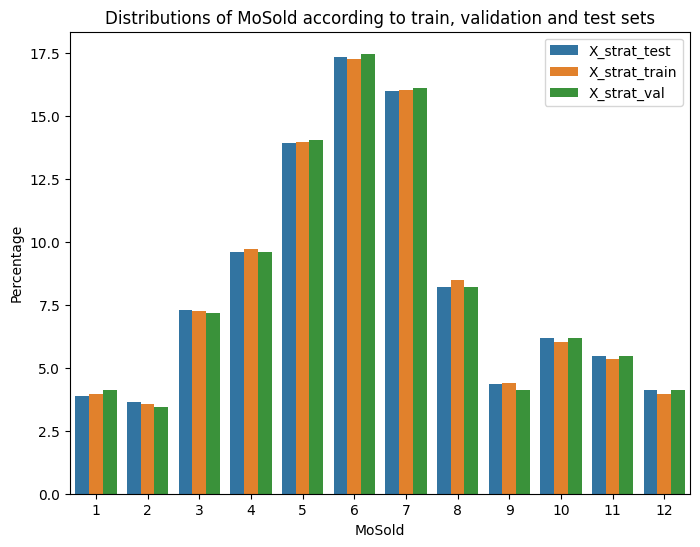

In [22]:
# your code here
X_strat_train['Source'] = 'X_strat_train'
X_strat_val['Source'] = 'X_strat_val'
X_strat_test['Source'] = 'X_strat_test'


combined_df = pd.concat([X_strat_train, X_strat_val, X_strat_test])


plt.figure(figsize=(8, 6))
percentages = combined_df.groupby(['Source', 'MoSold']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percent')

sns.barplot(data=percentages, x='MoSold', y = 'Percent', hue='Source')

plt.title('Distributions of MoSold according to train, validation and test sets')
plt.xlabel('MoSold')
plt.ylabel('Percentage')
plt.legend()

plt.show()